# Plotting Single TLE's:

In [35]:
# Imports:
from skyfield.api import EarthSatellite, load
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def tle_xyz(tle, array_of_epochs):
    # Load TLE:
    L1, L2 = tle.splitlines()
    # Calculate Trajectory across Epochs:
    starlink = EarthSatellite(L1, L2) # load SGP4
    position = starlink.at(array_of_epochs).position.km # run SGP4
    x = position[0,:]
    y = position[1,:]
    z = position[2,:]
    
    return x, y, z

In [53]:
def plot_satellite(satellite_tle, elev, azim, time):
    '''
    Function to plot satellite TLE around 3D model of Earth, at observer 
    elevation and azimuthal angle.
    '''
    
    # 3D Earth model:
    halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]
    degs, rads = 180/pi, pi/180
    theta = np.linspace(0, twopi, 201)
    cth, sth, zth = [f(theta) for f in [np.cos, np.sin, np.zeros_like]]
    lon0 = re*np.vstack((cth, zth, sth))
    lons = []
    for phi in rads*np.arange(0, 180, 15):
        cph, sph = [f(phi) for f in [np.cos, np.sin]]
        lon = np.vstack((lon0[0]*cph - lon0[1]*sph,
                         lon0[1]*cph + lon0[0]*sph,
                         lon0[2]) )
        lons.append(lon)

    lat0 = re*np.vstack((cth, sth, zth))
    lats = []
    for phi in rads*np.arange(-75, 90, 15):
        cph, sph = [f(phi) for f in [np.cos, np.sin]]
        lat = re*np.vstack((cth*cph, sth*cph, zth+sph))
        lats.append(lat)

    # Plotting Satellite Orbits:   
    fig = plt.figure(figsize=[8, 8])  
    ax  = fig.add_subplot(1, 1, 1, projection='3d')

    sat_norad = str(satellite_tle)[2:7]
    x_sat, y_sat, z_sat = tle_xyz(satellite_tle, time)
    ax.plot(x_sat, y_sat, z_sat, label=f'{sat_norad}', color='deeppink')

    # Plotting latitude/longitude lines:
    for x, y, z in lons:
        ax.plot(x, y, z, '-k')
    for x, y, z in lats:
        ax.plot(x, y, z, '-k')

    # Plotting parameters:
    ax.view_init(elev, azim)
    ax.set_title(f"NORAD ID {sat_norad} Trajectory:\n(elev={elev}$\degree$, azim={azim}$\degree$)")
    ax.set_xlabel('x (km)'), ax.set_ylabel('y (km)'), ax.set_zlabel('z (km)')
    ax.legend(loc='best')
    plt.show()

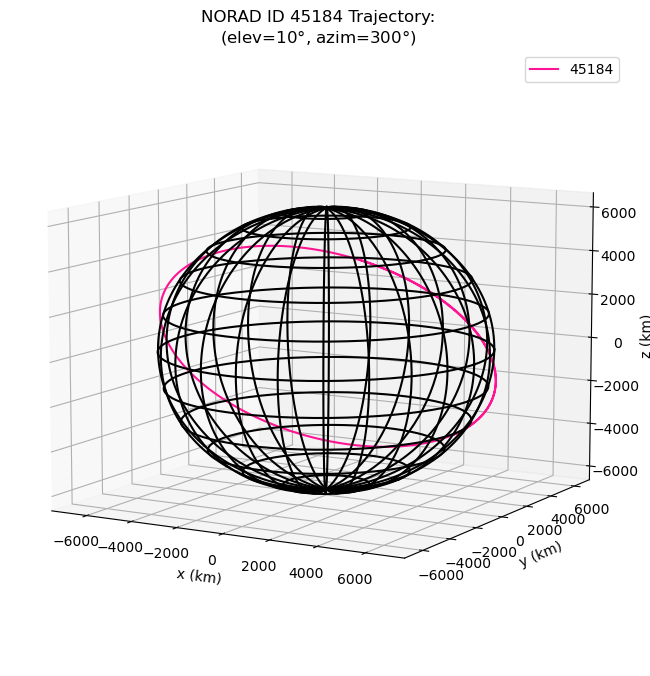

In [54]:
# TLE:
tle = '''1 45184U 20012G   25064.25002315  .00356607  59443-4  10540-2 0  9990
2 45184  53.0352 192.9089 0003887 301.4292 249.9972 15.92081662279489'''

# Define Orbit Epochs:
orbit_duration = np.arange(0, 7201, 1)  # orbit duration in seconds
epochs_of_orbit = ts.utc(2025, 3, 5, 22, 15, 0 + orbit_duration) # add duration to initial epoch

# Create Plot:
plot_satellite(tle, 10, 300, epochs_of_orbit)